# Mushroom Classifier


In [1]:
# Import libraries
import pycaret
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Perform an Exploratory Data Analysis on a Given Dataset (5 marks)

In [2]:
# Import data
df = pd.read_csv('../data/raw/02_mushroom_species_data.csv')
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,7932
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,6
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Check for missing values
df.isnull().sum()

class                         0
cap-shape                     0
cap-surface                   0
cap-color                     0
bruises                       0
odor                          0
gill-attachment               0
gill-spacing                  0
gill-size                     0
gill-color                    0
stalk-shape                   0
stalk-root                    0
stalk-surface-above-ring      0
stalk-surface-below-ring      0
stalk-color-above-ring        0
stalk-color-below-ring        0
veil-type                     0
veil-color                    0
ring-number                   0
ring-type                     0
spore-print-color             0
population                    0
habitat                     192
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

0

<Axes: xlabel='count', ylabel='class'>

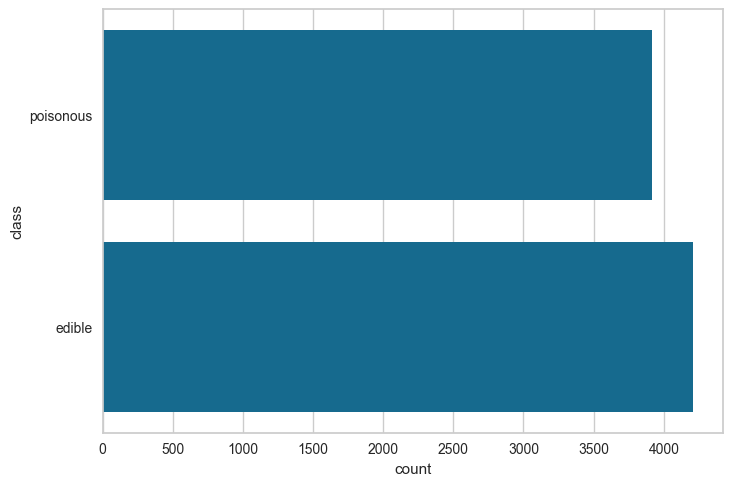

In [7]:
# Distrubution of target variable
sns.countplot(df['class'])

In [8]:
# Unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

class: ['poisonous' 'edible']
cap-shape: ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap-surface: ['smooth' 'scaly' 'fibrous' 'grooves']
cap-color: ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises: ['bruises' 'no']
odor: ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill-attachment: ['free' 'attached']
gill-spacing: ['close' 'crowded']
gill-size: ['narrow' 'broad']
gill-color: ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk-shape: ['enlarging' 'tapering']
stalk-root: ['equal' 'club' 'bulbous' 'rooted']
stalk-surface-above-ring: ['smooth' 'fibrous' 'silky' 'scaly']
stalk-surface-below-ring: ['smooth' 'fibrous' 'scaly' 'silky']
stalk-color-above-ring: ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk-color-below-ring: ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil-type: ['partial']
vei

## Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)

In [9]:
from pycaret.classification import *
setup(data = df, target = 'class',
    ordinal_features = {'ring-number': ['none','one','two']},
    remove_outliers=True,
    categorical_imputation='drop')

,Description,Value
0,Session id,8018
1,Target,class
2,Target type,Binary
3,Target mapping,"edible: 0, poisonous: 1"
4,Original data shape,"(8124, 23)"
5,Transformed data shape,"(7654, 108)"
6,Transformed train set shape,"(5279, 108)"
7,Transformed test set shape,"(2375, 108)"
8,Ordinal features,1
9,Categorical features,22


In [10]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:59:30
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9993,1.0000,0.9993,0.9993,0.9993,0.9986,0.9986,0.3120
et,Extra Trees Classifier,0.9980,1.0000,0.9980,0.9981,0.9980,0.9961,0.9961,0.3730
lr,Logistic Regression,0.9957,0.9999,0.9957,0.9957,0.9957,0.9913,0.9914,1.3010
knn,K Neighbors Classifier,0.9957,0.9989,0.9957,0.9958,0.9957,0.9914,0.9914,1.0480
xgboost,Extreme Gradient Boosting,0.9957,1.0000,0.9957,0.9957,0.9957,0.9913,0.9914,0.3550
lightgbm,Light Gradient Boosting Machine,0.9940,0.9973,0.9940,0.9941,0.9940,0.9881,0.9881,0.4270
svm,SVM - Linear Kernel,0.9924,0.9999,0.9924,0.9926,0.9924,0.9849,0.9850,0.2120
ada,Ada Boost Classifier,0.9872,0.9919,0.9872,0.9876,0.9872,0.9744,0.9748,0.3450
ridge,Ridge Classifier,0.9852,0.9985,0.9852,0.9857,0.9852,0.9704,0.9709,0.2670
gbc,Gradient Boosting Classifier,0.9852,1.0000,0.9852,0.9857,0.9852,0.9704,0.9709,0.3740


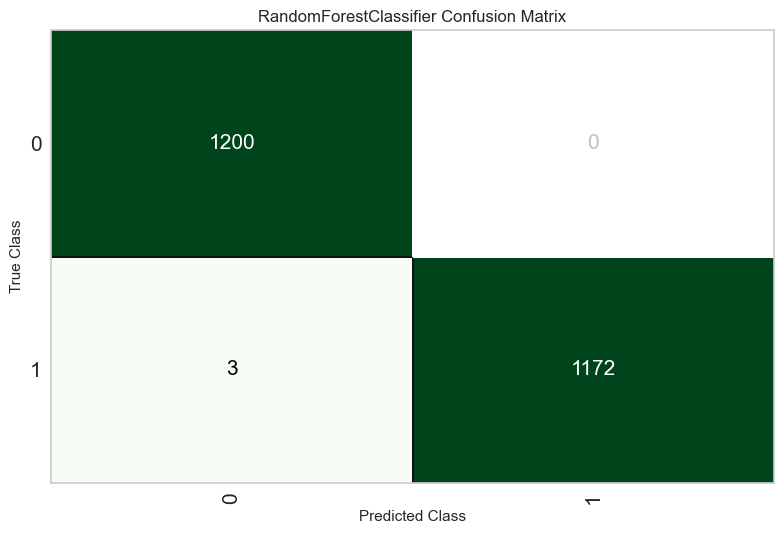

In [11]:
# Plot confusion matrix
plot_model(best, plot='confusion_matrix')

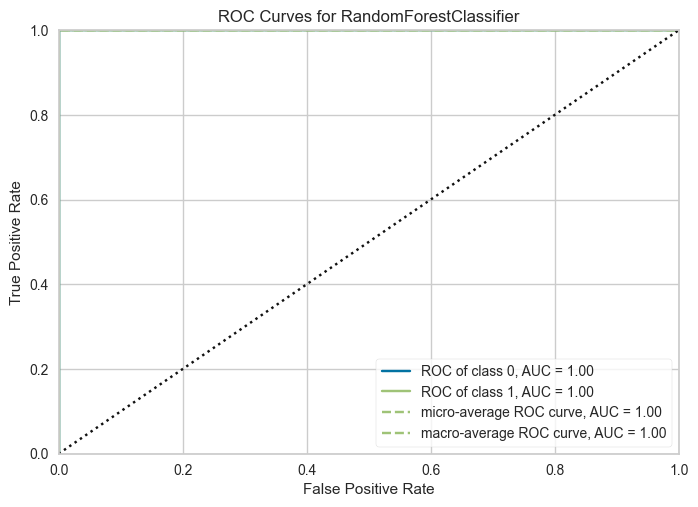

In [12]:
# Plot AUC-ROC
plot_model(best, plot='auc')

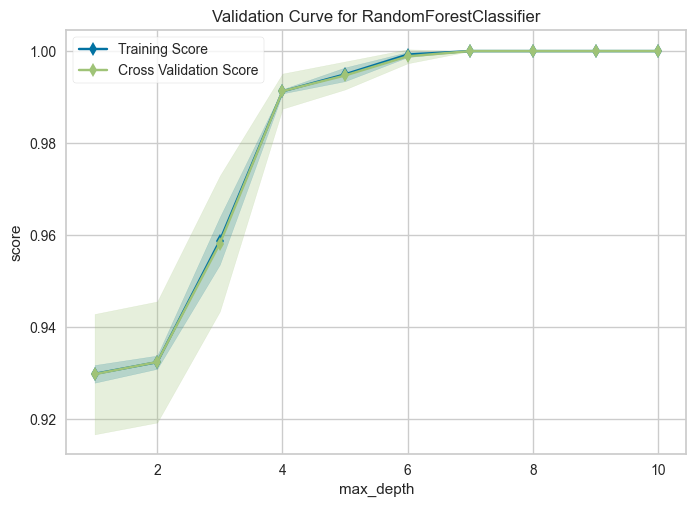

In [13]:
# Check for overfitting
plot_model(best, plot='vc')

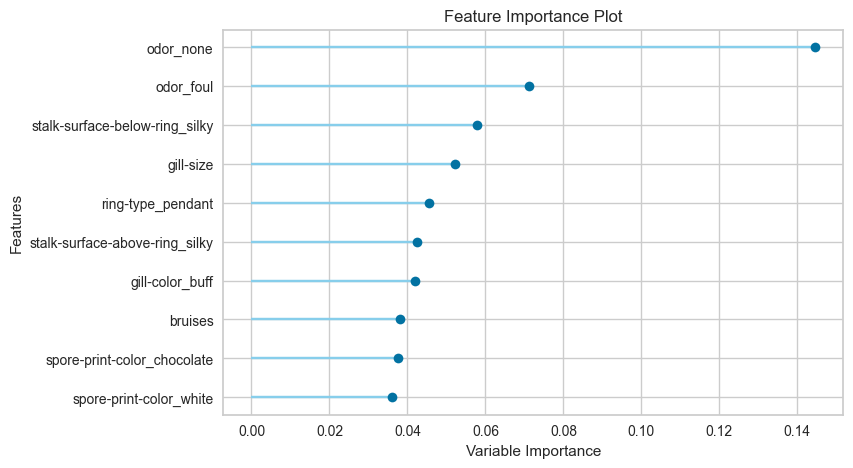

In [14]:
# Feauture importance
plot_model(best, plot='feature')

In [15]:
# Evaluate model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# Predict model
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9987,1.0000,0.9987,0.9987,0.9987,0.9975,0.9975


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,prediction_label,prediction_score
5920,flat,scaly,yellow,no,foul,free,close,broad,gray,enlarging,...,partial,white,one,large,chocolate,several,path,poisonous,poisonous,1.00
478,convex,smooth,white,bruises,almond,free,crowded,narrow,pink,tapering,...,partial,white,one,pendant,brown,several,woods,edible,edible,0.96
1151,flat,scaly,brown,bruises,almond,free,close,broad,brown,enlarging,...,partial,white,one,pendant,black,solitary,path,edible,edible,1.00
3638,flat,fibrous,gray,bruises,none,free,close,broad,white,tapering,...,partial,white,one,pendant,brown,solitary,woods,edible,edible,1.00
3944,flat,scaly,gray,no,foul,free,close,broad,pink,enlarging,...,partial,white,one,large,chocolate,several,woods,poisonous,poisonous,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,knobbed,smooth,red,no,spicy,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,woods,poisonous,poisonous,1.00
7645,knobbed,scaly,red,no,spicy,free,close,narrow,buff,tapering,...,partial,white,one,evanescent,white,several,path,poisonous,poisonous,1.00
3287,flat,scaly,red,bruises,none,free,close,broad,pink,tapering,...,partial,white,one,pendant,brown,solitary,woods,edible,edible,1.00
454,bell,smooth,white,bruises,anise,free,close,broad,gray,enlarging,...,partial,white,one,pendant,brown,numerous,meadows,edible,edible,1.00


In [17]:
# Save pipeline
save_model(best, '../models/mushroom_species_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
 